In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


In [2]:
class Implementations():
    def __init__(self, k, n):
        self.k = k
        self.n = n
    def regression(self, data, target):
        #10 times 5-fold cross validation
        rkf = RepeatedKFold(n_splits=self.k, n_repeats=self.n, random_state=2)
        score = 'neg_mean_absolute_error'
        #Regression Algorithms
        ID3 = DecisionTreeRegressor(criterion='mae')
        Adaboost = AdaBoostRegressor(n_estimators=100)
        RF = RandomForestRegressor(n_estimators=100)
        NB = GaussianNB()
        BG = BaggingRegressor(base_estimator=NB, n_estimators=100)
        KNN_M = KNeighborsRegressor()
        KNN_E = KNeighborsRegressor(metric='euclidean')
        #cross validation and scoring
        models = [ID3, Adaboost, RF, NB, BG, KNN_M, KNN_E]
        names = ['id3', 'Adaboost on Tree stumps', 'Random Forest', 'NaiveBayes',
                'Bagging with NaiveBayes', 'KNearestNeighbor with Minkowski metric',
                'KNearestNeighbor with Euclidean metric']
        for model, name in zip(models, names):
            results = cross_val_score(model, data, target, scoring=score, cv=rkf)
            print(name)
            print("Accuracy - Mean Absolute Error: ", np.mean(results))
            print("Standard deviation: ", np.std(results))
    def classification(self, data, target):
        #10 times stratified 5-fold cross validation
        rsf = RepeatedStratifiedKFold(n_splits=self.k, n_repeats=self.n, random_state=2)
        score = 'accuracy'
        #Classification Algorithms
        ID3 = DecisionTreeClassifier(criterion='entropy')
        Adaboost = AdaBoostClassifier(n_estimators=100)
        RF = RandomForestClassifier(n_estimators=100)
        NB = GaussianNB()
        BG = BaggingClassifier(base_estimator=NB, n_estimators=100)
        KNN_M = KNeighborsClassifier(metric='minkowski')
        KNN_E = KNeighborsClassifier(metric='euclidean')
        #cross validation and scoring
        models = [ID3, Adaboost, RF, NB, BG, KNN_M, KNN_E]
        names = ['id3', 'Adaboost on Tree stumps', 'Random Forest', 'NaiveBayes',
                'Bagging with NaiveBayes', 'KNearestNeighbor with Minkowski metric',
                'KNearestNeighbor with Euclidean metric']
        for model, name in zip(models, names):
            results = cross_val_score(model, data, target, scoring=score, cv=rsf)
            print(name)
            print("Accuracy: ", np.mean(results))
            print("Standard deviation: ", np.std(results))

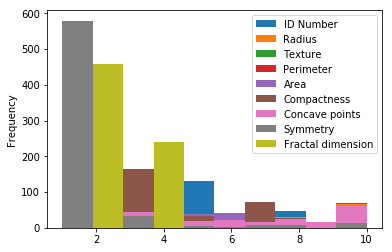

In [4]:
#1. Breast Cancer Wiconsin.data
#preprocessing
h = ['ID Number', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness',
    'Compactness', 'Concave points', 'Symmetry', 'Fractal dimension']
load_cancer = pd.read_csv('breast-cancer-wisconsin.data', header=None, names=h)
load_cancer = shuffle(load_cancer)
df_cancer = load_cancer.replace('?', 0)

cancer_target = df_cancer['Fractal dimension']
cancer_data = df_cancer.iloc[:,0:9]

#visualization
load_cancer.plot(kind='hist')

In [6]:
#5 Fold
k = 5 
#10 times
n = 10
Implementations(k, n).classification(cancer_data, cancer_target)

In [7]:
#2. letter reognition.data
#preprocessing
h = ['Letter', 'x-box horizontal', 'y-box vertical', 'width of box',
    'height of box', 'total on pixel', 'x-bar mean', 'y-bar mean',
    'x2bar mean', 'y2bar mean', 'xybar mean', 'x2ybr mean', 'xy2bar mean',
    'x_edge mean', 'xegvy correlation', 'y-edge mean', 'yegvx correlation']
load_letter = pd.read_csv('letter-recognition.data', header=None, names=h)

dic = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11, 'L':12, 'M':13, 'N':14, 'O':15, 'P':16, 'Q':17, 'R':18, 'S':19, 'T':20, 'U':21, 'V':22, 'W':23, 'X':24, 'Y':25, 'Z':26}
df_letter = load_letter.replace(dic)

letter_target = df_letter['Letter']
letter_data = df_letter.iloc[:,1:17]

letter_target = letter_target.astype(int)
letter_data = letter_data.astype(int)

#visualization
load_letter.plot(kind='hist')

In [8]:
Implementations(k, n).classification(letter_data, letter_target)

In [9]:
#3. Ecoli.data
#preprocessing
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', None)
pd.option_context('display.colheader_justify', 'right')

load_ecoli = pd.read_csv('ecoli.data', header=None)
a= load_ecoli.to_csv('ecoli.csv')

file = open('ecoli.csv', 'r')
ac = csv.reader(file)
nload_ecoli = [['Sequence name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2']]
for row in ac:
    data = row[1]
    data = data.split()
    data = data[1:9]
    if data == []:
        pass
    elif data[7] == 'cp':
        data[7] = 1
        #nload_ecoli.append(data)
    elif data[7] == 'im':
        data[7] = 2
    elif data[7] == 'pp':
        data[7] = 3
    elif data[7] == 'imU':
        data[7] = 4
    elif data[7] == 'om':
        data[7] = 5
    elif data[7] == 'omL':
        data[7] = 6
    elif data[7] == 'imL':
        data[7] = 7
    elif data[7] == 'imS':
        data[7] = 8
    for i in range(len(data)):
        data[i] = float(data[i])
    nload_ecoli.append(data)

nload_ecoli.remove(['Sequence name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2'])
nload_ecoli.remove([])
nload_ecoli = np.array(nload_ecoli)


ecoli_target = nload_ecoli[:, -1]
ecoli_data = nload_ecoli[:, :-1]


In [10]:
Implementations(k, n).classification(ecoli_data, ecoli_target)

In [11]:
#4. Car Evaluation.data

#preprocessing
headc = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
load_car = pd.read_csv('car.data', header=None, names=headc)


load_car['buying'] = load_car['buying'].replace({'vhigh': 1, 'high': 2, 'med': 3, 'low':4})
load_car['maint'] = load_car['maint'].replace({'vhigh': 1, 'high': 2, 'med': 3, 'low': 4})
load_car['doors'] = load_car['doors'].replace({'more': 6, '5more': 6})
load_car['persons'] = load_car['persons'].replace('more', 6)
load_car['lug_boot'] = load_car['lug_boot'].replace({'small': 1, 'med': 2, 'big': 3})
load_car['safety'] = load_car['safety'].replace({'low':1, 'med': 2, 'high': 3})
load_car['class'] = load_car['class'].replace({'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4})


car_target = load_car['class']
car_data = load_car.iloc[:,0:6]

#visualization
load_car.plot(kind='hist')

In [12]:
Implementations(k, n).classification(car_data, car_target)

In [13]:
#5. Mushroom.data

#preprocessing
h = ['target', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attc',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-ar', 'stalk-surface-br', 'stalk-color-ar', 'stalk-color-br',
    'veil-type', 'veil-color', 'ring-num', 'ring-type', 'spore-print-col',
    'population', 'habitat']
load_mushroom = pd.read_csv('mushroom.data', header=None, names=h)

f0 = {'e':0, 'p':1}
load_mushroom['target'] = load_mushroom['target'].replace(f0)
f1 = {'b':1, 'c':2, 'x':3, 'f':4, 'k':5, 's':6}
load_mushroom['cap-shape'] = load_mushroom['cap-shape'].replace(f1)
f2 = {'f':1, 'g':2, 'y':3, 's':4}
load_mushroom['cap-surface'] = load_mushroom['cap-surface'].replace(f2)
f3 = {'n':1, 'b':2, 'c':3, 'g':4, 'r':5, 'p':6, 'u':7, 'e':6, 'w':7, 'y':8}
load_mushroom['cap-color'] = load_mushroom['cap-color'].replace(f3)
f4 = {'t':1, 'f':2}
load_mushroom['bruises'] = load_mushroom['bruises'].replace(f4)
f5 = {'a':1, 'l':2, 'c':3, 'y':4, 'f':5, 'm':6, 'n':7, 'p':8, 's':9}
load_mushroom['odor'] = load_mushroom['odor'].replace(f5)
f6 = {'a':1, 'd':2, 'f':3, 'n':4}
load_mushroom['gill-attc'] = load_mushroom['gill-attc'].replace(f6)
f7 = {'c':1, 'w':2, 'd':3}
load_mushroom['gill-spacing'] = load_mushroom['gill-spacing'].replace(f7)
f8 = {'b':1, 'n':2}
load_mushroom['gill-size'] = load_mushroom['gill-size'].replace(f8)
f9 = {'k':1, 'n':2, 'b':3, 'h':4, 'g':5, 'r':6, 'o':7, 'p':8, 'u':9, 'e':10, 'w':11, 'y':12}
load_mushroom['gill-color'] = load_mushroom['gill-color'].replace(f9)
f10 = {'e':1, 't':2}
load_mushroom['stalk-shape'] = load_mushroom['stalk-shape'].replace(f10)
f11 = {'b':1, 'c':2, 'u':3, 'e':4, 'z':5, 'r':6, '?':0}
load_mushroom['stalk-root'] = load_mushroom['stalk-root'].replace(f11)
f12 = {'f':1, 'y':2, 'k':3, 's':4}
load_mushroom['stalk-surface-ar'] = load_mushroom['stalk-surface-ar'].replace(f12)
load_mushroom['stalk-surface-br'] = load_mushroom['stalk-surface-br'].replace(f12)
f13 = {'n':1, 'b':2, 'c':3, 'g':4, 'o':5, 'p':6, 'e':7, 'w':8, 'y':9}
load_mushroom['stalk-color-ar'] = load_mushroom['stalk-color-ar'].replace(f13)
load_mushroom['stalk-color-br'] = load_mushroom['stalk-color-br'].replace(f13)
f14 = {'p':1, 'u':2}
load_mushroom['veil-type'] = load_mushroom['veil-type'].replace(f14)
f15 = {'n':1, 'o':2, 'w':3, 'y':4}
load_mushroom['veil-color'] = load_mushroom['veil-color'].replace(f15)
f16 = {'n':1, 'o':2, 't':3}
load_mushroom['ring-num'] = load_mushroom['ring-num'].replace(f16)
f17 = {'c':1, 'e':2, 'f':3, 'l':4, 'n':5, 'p':6, 's':7, 'z':8}
load_mushroom['ring-type'] = load_mushroom['ring-type'].replace(f17)
f18 = {'k':1, 'n':2, 'b':3, 'h':4, 'r':5, 'o':6, 'u':7, 'w':8, 'y':9}
load_mushroom['spore-print-col'] = load_mushroom['spore-print-col'].replace(f18)
f19 = {'a':1, 'c':2, 'n':3, 's':4, 'v':5, 'y':6}
load_mushroom['population'] = load_mushroom['population'].replace(f19)
f20 = {'g':1, 'l':2, 'm':3, 'p':4, 'u':5, 'w':6, 'd':7}
load_mushroom['habitat'] = load_mushroom['habitat'].replace(f20)

mushroom_target = load_mushroom['target']
mushroom_data = load_mushroom.iloc[:,1:23]

#visualization
load_mushroom.plot(kind='hist')


In [14]:
Implementations(k, n).classification(mushroom_data, mushroom_target)

id3
Accuracy:  1.0
Standard deviation:  0.0
Adaboost on Tree stumps
Accuracy:  1.0
Standard deviation:  0.0
Random Forest
Accuracy:  1.0
Standard deviation:  0.0
NaiveBayes
Accuracy:  0.844915733278894
Standard deviation:  0.010449078564665504
Bagging with NaiveBayes
Accuracy:  0.842761621556117
Standard deviation:  0.010654864834539401
KNearestNeighbor with Minkowski metric
Accuracy:  0.9997292155373998
Standard deviation:  0.0005923620586867294
KNearestNeighbor with Euclidean metric
Accuracy:  0.9997292155373998
Standard deviation:  0.0005923620586867294
